<a href="https://colab.research.google.com/github/Glasiermedic/Make-your-own-neural-network/blob/master/attractive_celeb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
!pip3 install seaborn==0.9.0

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('white')


In [0]:
celebs = pd.read_csv("https://raw.githubusercontent.com/Glasiermedic/Make-your-own-neural-network/master/list_attr_celeba.csv")

In [0]:
celeb = celebs.sample(frac=0.2)

In [4]:
celeb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40520 entries, 51230 to 68707
Data columns (total 41 columns):
image_id               40520 non-null object
5_o_Clock_Shadow       40520 non-null int64
Arched_Eyebrows        40520 non-null int64
Attractive             40520 non-null int64
Bags_Under_Eyes        40520 non-null int64
Bald                   40520 non-null int64
Bangs                  40520 non-null int64
Big_Lips               40520 non-null int64
Big_Nose               40520 non-null int64
Black_Hair             40520 non-null int64
Blond_Hair             40520 non-null int64
Blurry                 40520 non-null int64
Brown_Hair             40520 non-null int64
Bushy_Eyebrows         40520 non-null int64
Chubby                 40520 non-null int64
Double_Chin            40520 non-null int64
Eyeglasses             40520 non-null int64
Goatee                 40520 non-null int64
Gray_Hair              40520 non-null int64
Heavy_Makeup           40520 non-null int64
High_C

In [5]:
celeb.columns


Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

In [0]:
celeb = celeb.drop(['image_id'], axis = 1)


In [0]:
kfolds = StratifiedShuffleSplit(n_splits =10, random_state=1)

In [0]:
scaler = MinMaxScaler(copy=True, feature_range=(-1, 1))
celeb_scal = scaler.fit_transform(celeb)
celeb_1 = pd.DataFrame(celeb_scal)

In [0]:
celebs = celebs.drop(['image_id'], axis = 1)
celebs_scal = scaler.fit_transform(celebs)
celebs1 =pd.DataFrame(celebs_scal)

In [0]:
celeb_1.columns = celeb.columns

In [11]:
celeb_1.describe()


,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
count,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000
mean,-0.778332,-0.467029,0.034600,-0.592448,-0.955183,-0.697779,-0.515696,-0.535143,-0.520582,-0.698963,-0.898618,-0.595311,-0.719299,-0.888351,-0.907453,-0.871372,-0.878332,-0.919546,-0.222162,-0.086871,-0.170336,-0.033662,-0.916683,-0.768263,0.673198,-0.430800,-0.912043,-0.438598,-0.841658,-0.866683,-0.889388,-0.042892,-0.586772,-0.356170,-0.621767,-0.904442,-0.049309,-0.754886,-0.853504,0.552468
std,0.627861,0.884253,0.999414,0.805619,0.296021,0.716322,0.856782,0.844772,0.853822,0.715166,0.438737,0.803505,0.694709,0.459170,0.420159,0.490629,0.478058,0.392987,0.975022,0.996232,0.985398,0.999446,0.399620,0.640143,0.739471,0.902459,0.410099,0.898694,0.540017,0.498865,0.457159,0.999092,0.809762,0.934433,0.783212,0.426601,0.998796,0.655864,0.521092,0.833544
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
50%,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
75%,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


for col in celeb_1:
  sns_plot = sns.distplot(celeb_1[col], label = col)
  #plt.title(col)
  plt.show()

%%time

plt.figure(figsize=(15,5))
for item in celeb_1.columns:
  plt.figure(figsize=(15,5))
  sns.scatterplot(x =celeb_1[item], y = celeb_1['Attractive'])
  plt.title(item)
  plt.show()

In [0]:
X = celeb_1.drop(['Attractive'], axis = 1)
Y = celeb_1['Attractive']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
forest = RandomForestClassifier( n_jobs=-1, class_weight='balanced', n_estimators = 500, max_features = 7, max_depth=12, random_state = 1)

print(cross_val_score(forest,X_train, y_train, cv=kfolds, scoring = 'recall', verbose = 2))
pred_y_sklearn =cross_val_predict(forest, X_test, y_test, cv=10)
y_true = y_test
y_pred = cross_val_predict(forest, X_test, y_test, cv=10)
print('Confusion Matrix')
print(confusion_matrix(y_pred, y_true))
print(pd.crosstab(pred_y_sklearn, y_test))
print("")
print(classification_report(y_pred, y_true))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=  11.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.1s remaining:    0.0s


[CV] ................................................. , total=   9.1s
[CV]  ................................................................
[CV] ................................................. , total=   9.1s
[CV]  ................................................................
[CV] ................................................. , total=   9.1s
[CV]  ................................................................
[CV] ................................................. , total=   9.1s
[CV]  ................................................................
[CV] ................................................. , total=   9.0s
[CV]  ................................................................
[CV] ................................................. , total=   8.9s
[CV]  ................................................................
[CV] ................................................. , total=   9.1s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.5min finished


Confusion Matrix
[[3003  920]
 [ 818 3363]]
Attractive  -1.0   1.0
row_0                 
-1.0        3003   920
 1.0         818  3363

              precision    recall  f1-score   support

        -1.0       0.79      0.77      0.78      3923
         1.0       0.79      0.80      0.79      4181

    accuracy                           0.79      8104
   macro avg       0.79      0.78      0.79      8104
weighted avg       0.79      0.79      0.79      8104



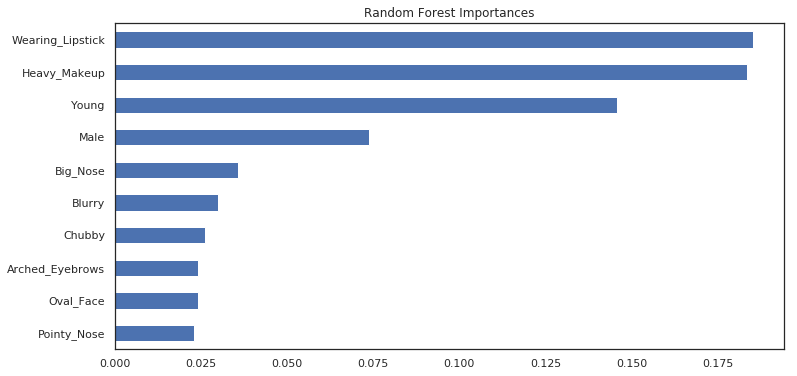

In [16]:
forest.fit(X_train, y_train)
importances_for = forest.feature_importances_

indices = np.argsort(importances_for)[::-1]
for_imp_feat = []

for f in range(X.shape[1]):
    for_imp_feat.append(X.columns[indices[f]])

importances_df = pd.Series(importances_for, index=X.columns)
importances_df.nlargest(10).sort_values().plot(kind='barh', figsize=(12, 6)) 
plt.title("Random Forest Importances")
plt.show()

In [0]:
X = celeb_1.drop(['Attractive'], axis = 1)
X_2 = X[list(for_imp_feat)[:20]]
Y = celeb_1['Attractive']

X3 =celebs.drop(['Attractive'],axis =1)
Y3 =celebs['Attractive']

In [0]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, Y, test_size=0.2, random_state=1)

In [0]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y3, test_size=0.2, random_state=1)

In [0]:
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.neural_network import MLPClassifier

In [0]:
mlp = MLPClassifier(alpha=0.01, hidden_layer_sizes=(5,100,5), activation='relu', solver='sgd', 
                    learning_rate='adaptive', warm_start=True,  verbose = 1,
                    max_iter = 50, random_state=1, tol=0.0001)
#mlp.fit(X_train, y_train)
#mlp.score(X_test, y_test)

In [0]:
#cross_val_score(mlp, X, Y, cv=kfolds, verbose = 1)

In [0]:
alpha_list = [ .01, .05]
layer_lists = [(5,100,5),(100,)]
parameters = {'alpha':alpha_list, 'hidden_layer_sizes': layer_lists,
                    'solver': [ 'sgd', 'adam']}
 #if marked out once it has ran and the best estimator is identified.  The best estimator is then put into the mlp algorithm below for the final model
#mlp_grid = GridSearchCV(mlp, parameters, cv=kfolds, scoring='neg_mean_squared_error')
#mlp_grid.fit(X3_train,y3_train)        
#print (mlp_grid.best_estimator_)
#print(np.sqrt(-mlp_grid.best_score_))

In [0]:
mlp = MLPClassifier(alpha=0.01, hidden_layer_sizes=(5,100,5,5), activation='relu', solver='sgd', 
                    learning_rate='adaptive', warm_start=True,  verbose = 1,
                    max_iter = 200, random_state=1, tol=0.0001)
#mlp.fit(X_train, y_train)
#mlp.score(X_test, y_test)

In [25]:
print(cross_val_score(mlp,X3_train, y3_train, cv=kfolds, scoring = 'neg_mean_squared_error', verbose = 1))
pred3_y_sklearn =cross_val_predict(mlp, X3_test, y3_test, cv=5)
y3_true = y_test
y3_pred = cross_val_predict(mlp, X3_test, y3_test, cv=5)
print('Confusion Matrix')
print(confusion_matrix(y3_pred, y3_true))
print(pd.crosstab(pred3_y_sklearn, y3_test))
print("")
print(classification_report(y3_pred, y3_true))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = 0.69718094
Iteration 2, loss = 0.69156712
Iteration 3, loss = 0.65857057
Iteration 4, loss = 0.57186286
Iteration 5, loss = 0.53695682
Iteration 6, loss = 0.51291211
Iteration 7, loss = 0.49193370
Iteration 8, loss = 0.47734793
Iteration 9, loss = 0.46900328
Iteration 10, loss = 0.46393210
Iteration 11, loss = 0.46050992
Iteration 12, loss = 0.45803563
Iteration 13, loss = 0.45609528
Iteration 14, loss = 0.45446113
Iteration 15, loss = 0.45315905
Iteration 16, loss = 0.45208735
Iteration 17, loss = 0.45110789
Iteration 18, loss = 0.45027794
Iteration 19, loss = 0.44965613
Iteration 20, loss = 0.44905115
Iteration 21, loss = 0.44857952
Iteration 22, loss = 0.44805294
Iteration 23, loss = 0.44760719
Iteration 24, loss = 0.44717200
Iteration 25, loss = 0.44678241
Iteration 26, loss = 0.44648444
Iteration 27, loss = 0.44620198
Iteration 28, loss = 0.44590723
Iteration 29, loss = 0.44564931
Iteration 30, loss = 0.44533193
Iteration 31, loss = 0.44514806
Iteration 32, los

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 19.8min finished


Iteration 1, loss = 0.70309445
Iteration 2, loss = 0.69719594
Iteration 3, loss = 0.69482624
Iteration 4, loss = 0.69373604
Iteration 5, loss = 0.69304578
Iteration 6, loss = 0.69237380
Iteration 7, loss = 0.69132068
Iteration 8, loss = 0.68936854
Iteration 9, loss = 0.68555787
Iteration 10, loss = 0.67787178
Iteration 11, loss = 0.66264500
Iteration 12, loss = 0.63634840
Iteration 13, loss = 0.60613206
Iteration 14, loss = 0.58398666
Iteration 15, loss = 0.56947879
Iteration 16, loss = 0.55891029
Iteration 17, loss = 0.55058478
Iteration 18, loss = 0.54351992
Iteration 19, loss = 0.53706841
Iteration 20, loss = 0.53112219
Iteration 21, loss = 0.52553838
Iteration 22, loss = 0.52017809
Iteration 23, loss = 0.51497390
Iteration 24, loss = 0.50983375
Iteration 25, loss = 0.50493420
Iteration 26, loss = 0.50011049
Iteration 27, loss = 0.49551006
Iteration 28, loss = 0.49140303
Iteration 29, loss = 0.48747918
Iteration 30, loss = 0.48403555
Iteration 31, loss = 0.48084097
Iteration 32, los

ValueError: ignored

In [26]:
print(cross_val_score(mlp,X2_train, y2_train, cv=kfolds, scoring = 'neg_mean_squared_error', verbose = 1))
pred2_y_sklearn =cross_val_predict(mlp, X2_test, y2_test, cv=2)
y2_true = y_test
y2_pred = cross_val_predict(mlp, X2_test, y2_test, cv=10)
print('Confusion Matrix')
print(confusion_matrix(y2_pred, y2_true))
print(pd.crosstab(pred2_y_sklearn, y2_test))
print("")
print(classification_report(y2_pred, y2_true))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = 0.68867077
Iteration 2, loss = 0.65757270
Iteration 3, loss = 0.60429991
Iteration 4, loss = 0.54326951
Iteration 5, loss = 0.51003264
Iteration 6, loss = 0.49543485
Iteration 7, loss = 0.48816258
Iteration 8, loss = 0.48369529
Iteration 9, loss = 0.48051539
Iteration 10, loss = 0.47836426
Iteration 11, loss = 0.47648399
Iteration 12, loss = 0.47489572
Iteration 13, loss = 0.47359533
Iteration 14, loss = 0.47241427
Iteration 15, loss = 0.47129791
Iteration 16, loss = 0.47046764
Iteration 17, loss = 0.46946036
Iteration 18, loss = 0.46869860
Iteration 19, loss = 0.46781178
Iteration 20, loss = 0.46703350
Iteration 21, loss = 0.46648634
Iteration 22, loss = 0.46566916
Iteration 23, loss = 0.46496762
Iteration 24, loss = 0.46450467
Iteration 25, loss = 0.46372691
Iteration 26, loss = 0.46342562
Iteration 27, loss = 0.46289842
Iteration 28, loss = 0.46244153
Iteration 29, loss = 0.46201185
Iteration 30, loss = 0.46178313
Iteration 31, loss = 0.46122100
Iteration 32, los

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.8min finished


Iteration 2, loss = 0.69824572
Iteration 3, loss = 0.69275587
Iteration 4, loss = 0.68772631
Iteration 5, loss = 0.68348064
Iteration 6, loss = 0.67945942
Iteration 7, loss = 0.67532180
Iteration 8, loss = 0.67101083
Iteration 9, loss = 0.66635045
Iteration 10, loss = 0.66120602
Iteration 11, loss = 0.65558460
Iteration 12, loss = 0.64921312
Iteration 13, loss = 0.64221801
Iteration 14, loss = 0.63437610
Iteration 15, loss = 0.62577193
Iteration 16, loss = 0.61652151
Iteration 17, loss = 0.60663302
Iteration 18, loss = 0.59631667
Iteration 19, loss = 0.58570345
Iteration 20, loss = 0.57531539
Iteration 21, loss = 0.56508518
Iteration 22, loss = 0.55544467
Iteration 23, loss = 0.54687363
Iteration 24, loss = 0.53911591
Iteration 25, loss = 0.53229229
Iteration 26, loss = 0.52616585
Iteration 27, loss = 0.52068263
Iteration 28, loss = 0.51594331
Iteration 29, loss = 0.51183217
Iteration 30, loss = 0.50834367
Iteration 31, loss = 0.50503169
Iteration 32, loss = 0.50226651
Iteration 33, lo